## *GRPD - a GAN-Resistant Phishing Detection tool*

Main Objective: By analyzing diverse data sources such as URLs, HTML content, metadata, and user behavior, GRPD uses GAN generated samples to avoid adversarial attacks.

This notebook provides a comprehensive walkthrough of data analysis and visualization steps.

In [ ]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

To get live phishing data for updated analysis, you can use these code snippets for retrieval and converting it into csv file

In [2]:
!wget https://raw.githubusercontent.com/openphish/public_feed/refs/heads/main/feed.txt

--2025-01-31 17:17:59--  https://raw.githubusercontent.com/openphish/public_feed/refs/heads/main/feed.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22756 (22K) [text/plain]
Saving to: ‘feed.txt’

feed.txt            100%[===================>]  22.22K  --.-KB/s    in 0.002s  

2025-01-31 17:17:59 (14.3 MB/s) - ‘feed.txt’ saved [22756/22756]



In [4]:
import csv


input_file = "feed.txt"  # Your text file
output_file = "output.csv"  # Output CSV file


with open(input_file, "r") as infile, open(output_file, "w", newline="") as outfile:
    writer = csv.writer(outfile)

    for line in infile:
        columns = line.strip().split()
        writer.writerow(columns)

print("Conversion completed: output.csv")

Conversion completed: output.csv


*Load the dataset from the local machine*
1. legitimate data from https://www.unb.ca/cic/datasets/url-2016.html
2. Phishing data from https://www.phishtank.com/developer_info.php , https://www.openphish.com/phishing_feeds.html and https://github.com/JPCERTCC/phishurl-list

In [ ]:
legitimate = pd.read_csv("/content/legitimate.csv")
phishing = pd.read_csv("/content/phishing.csv")

In [ ]:
legitimate.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
phishing.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,ecrbnvhafhugtkrbfbbgypv.kejiadmin.cn,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1
1,tkiqcybvzaodsquksskzgthq.xmcm10.cn,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1
2,cistaturko.wixsite.com,0,0,0,1,0,0,0,0,1,1,1,0,1,1,0,1
3,thunderteacher.com,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,meenchanrinwile.iusacom.com,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1


### *Understanding how data is organized and performing initial analysis*

Printing last five rows

In [ ]:
legitimate.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
4995,getpocket.com,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0
4996,olx.ro,0,0,1,7,0,0,0,0,0,0,0,0,0,1,1,0
4997,medium.com,0,1,1,2,0,0,0,0,0,0,1,0,0,1,0,0
4998,thenextweb.com,0,0,1,6,0,0,0,0,0,0,0,0,0,1,0,0
4999,smallseotools.com,0,0,1,2,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
phishing.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
4995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1
4996,adplife.com,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0,1
4997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,1,1,1,0,1,0,1
4998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1
4999,sieck-kuehlsysteme.de,0,1,1,4,0,0,1,1,0,1,1,0,0,1,0,1


Get a concise summary of the DataFrame

In [ ]:
legitimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         5000 non-null   object
 1   Have_IP        5000 non-null   int64 
 2   Have_At        5000 non-null   int64 
 3   URL_Length     5000 non-null   int64 
 4   URL_Depth      5000 non-null   int64 
 5   Redirection    5000 non-null   int64 
 6   https_Domain   5000 non-null   int64 
 7   TinyURL        5000 non-null   int64 
 8   Prefix/Suffix  5000 non-null   int64 
 9   DNS_Record     5000 non-null   int64 
 10  Domain_Age     5000 non-null   int64 
 11  Domain_End     5000 non-null   int64 
 12  iFrame         5000 non-null   int64 
 13  Mouse_Over     5000 non-null   int64 
 14  Right_Click    5000 non-null   int64 
 15  Web_Forwards   5000 non-null   int64 
 16  Label          5000 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 664.2+ KB


In [ ]:
phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         5000 non-null   object
 1   Have_IP        5000 non-null   int64 
 2   Have_At        5000 non-null   int64 
 3   URL_Length     5000 non-null   int64 
 4   URL_Depth      5000 non-null   int64 
 5   Redirection    5000 non-null   int64 
 6   https_Domain   5000 non-null   int64 
 7   TinyURL        5000 non-null   int64 
 8   Prefix/Suffix  5000 non-null   int64 
 9   DNS_Record     5000 non-null   int64 
 10  Domain_Age     5000 non-null   int64 
 11  Domain_End     5000 non-null   int64 
 12  iFrame         5000 non-null   int64 
 13  Mouse_Over     5000 non-null   int64 
 14  Right_Click    5000 non-null   int64 
 15  Web_Forwards   5000 non-null   int64 
 16  Label          5000 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 664.2+ KB


Inspecting the rows and columns available in the dataset

In [ ]:
legitimate.shape

(5000, 17)

In [ ]:
phishing.shape

(5000, 17)

Listing all column names

In [ ]:
legitimate.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
phishing.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')

View data types of each column

In [ ]:
legitimate.dtypes

,0
Domain,object
Have_IP,int64
Have_At,int64
URL_Length,int64
URL_Depth,int64
Redirection,int64
https_Domain,int64
TinyURL,int64
Prefix/Suffix,int64
DNS_Record,int64


In [ ]:
phishing.dtypes

,0
Domain,object
Have_IP,int64
Have_At,int64
URL_Length,int64
URL_Depth,int64
Redirection,int64
https_Domain,int64
TinyURL,int64
Prefix/Suffix,int64
DNS_Record,int64


summary statistics for numerical columns

In [ ]:
legitimate.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,5000.0,5000.000000,5000.0,5000.000000,5000.000000,5000.0,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.00000,5000.0
mean,0.0,0.005000,1.0,3.326800,0.013200,0.0,0.069400,0.00520,0.096000,0.455600,0.836800,0.062600,0.053800,1.0,0.11800,0.0
std,0.0,0.070541,0.0,1.995394,0.114142,0.0,0.254159,0.07193,0.294621,0.498075,0.369585,0.242266,0.225645,0.0,0.32264,0.0
min,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000,0.0
25%,0.0,0.000000,1.0,2.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.00000,0.0
50%,0.0,0.000000,1.0,3.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.00000,0.0
75%,0.0,0.000000,1.0,4.000000,0.000000,0.0,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.00000,0.0
max,0.0,1.000000,1.0,18.000000,1.000000,0.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.00000,0.0


In [ ]:
phishing.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,0.003600,0.012800,0.180200,1.057800,0.006000,0.000200,0.054200,0.133800,0.524800,0.349000,0.684400,0.695800,0.724400,0.999600,0.655200,1.0
std,0.059898,0.112422,0.384392,1.727384,0.077235,0.014142,0.226435,0.340471,0.499435,0.476702,0.464801,0.460114,0.446861,0.019998,0.475351,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


Drop column because the web traffic data extracting site is unavailable now

Visualize the data loaded

1. Histogram

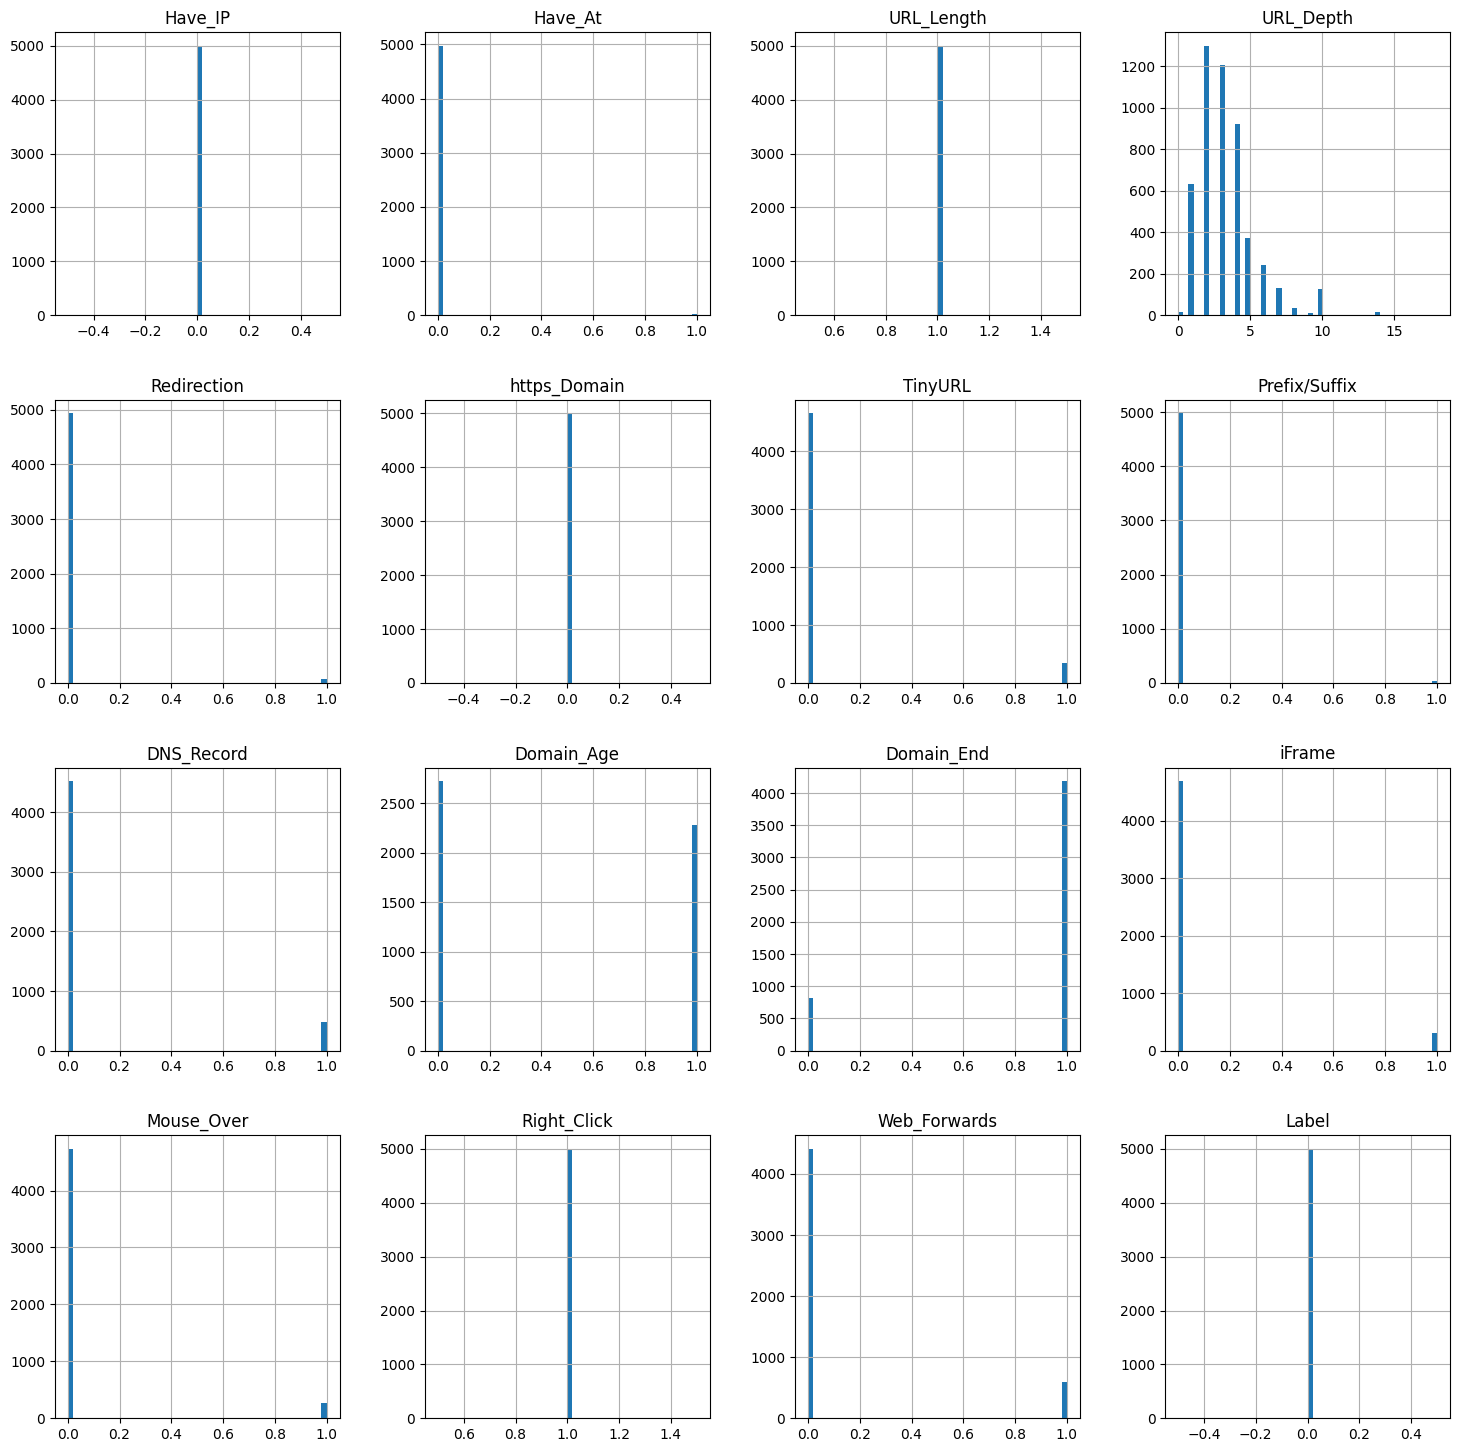

In [ ]:
#Plotting the data distribution
legitimate.hist(bins = 50,figsize = (18,18))
plt.show()

Summary of above plot

1. Have_IP, Have_At, Redirection: Most legitimate URLs don't have these properties, as their values are mostly 0.

2. URL_Length : shows a skewed distribution. Most legitimate URLs have short lengths, with a few exceptions that are longer.

3. Domain_Age and Domain_End : Legit urls has proper registrations and validity.

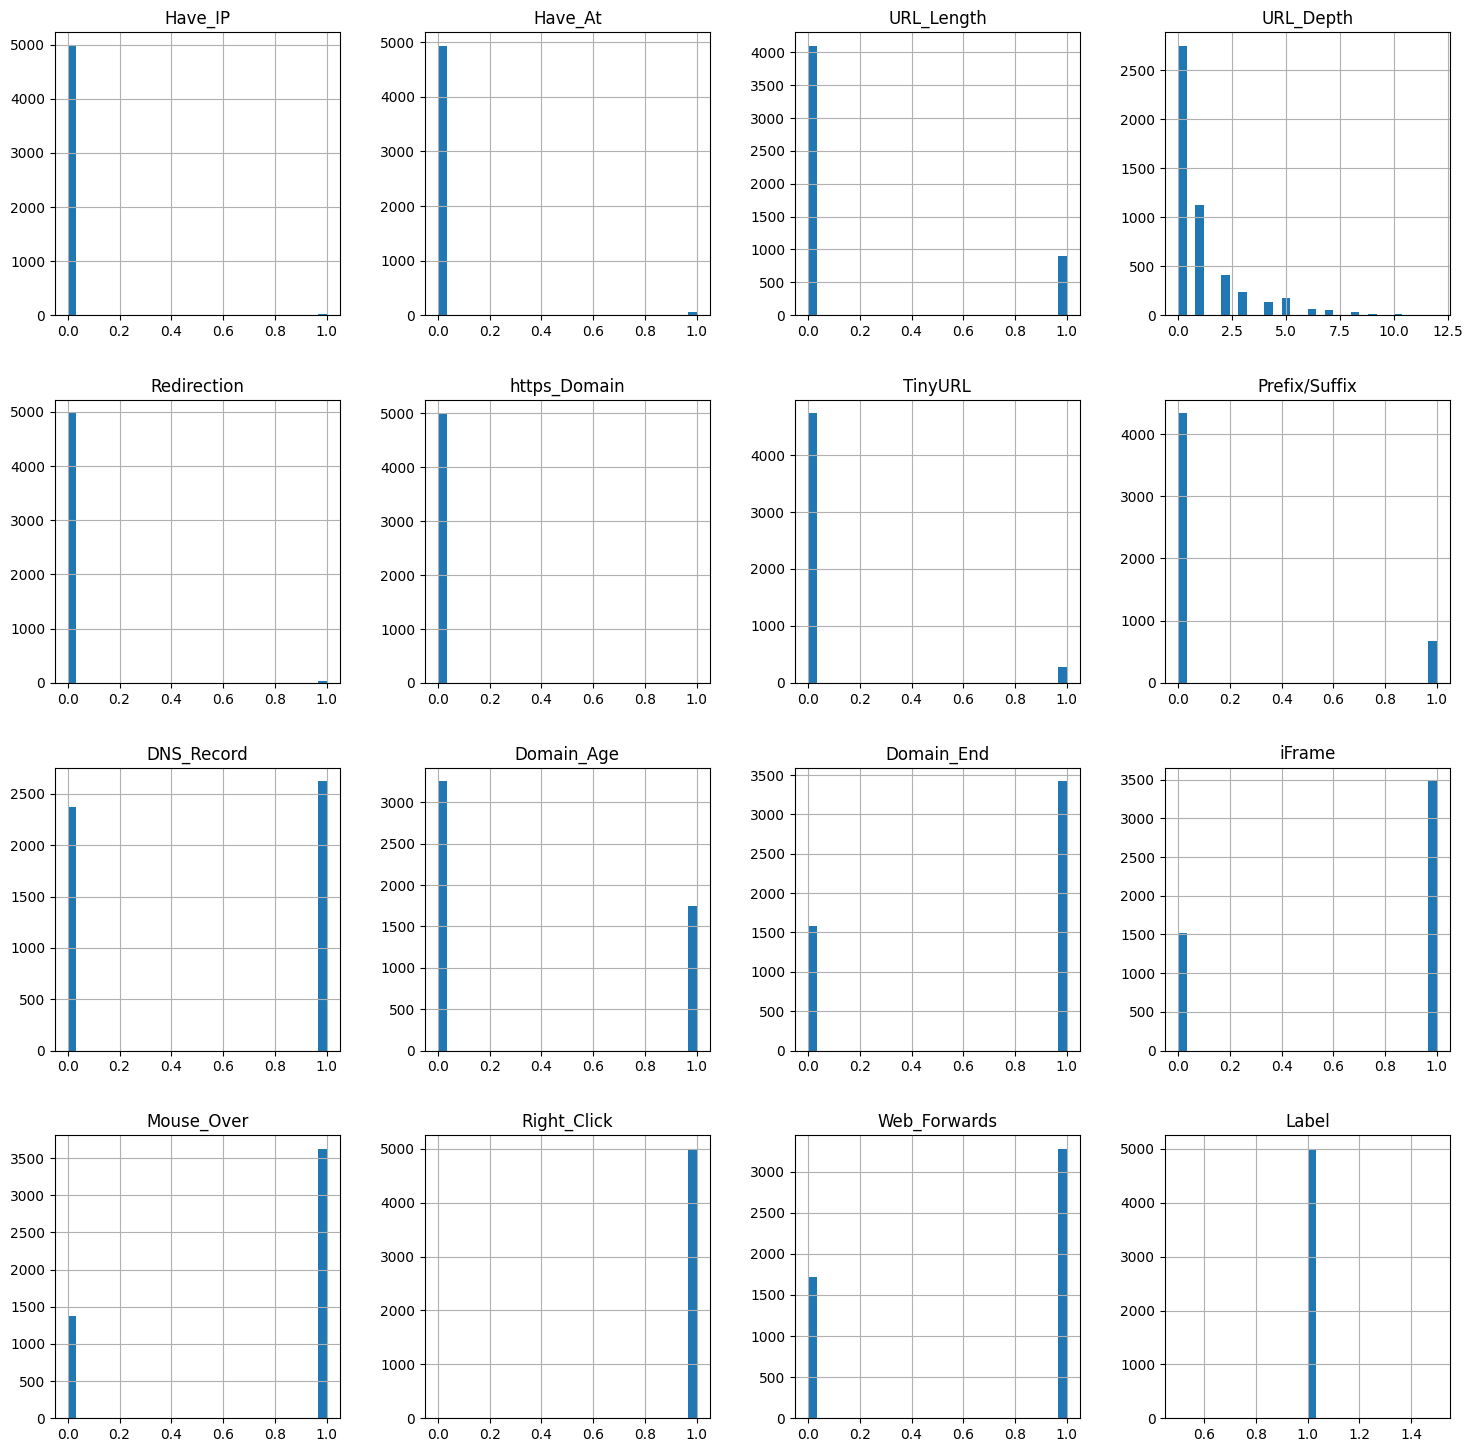

In [ ]:
phishing.hist(bins = 30,figsize = (18,18))
plt.show()

Summary of above plot

1. Web_traffic is not available for now, but this data is already preprocessed so later we will remove the column.

2. Right_Click -> feature says phishers usually disable this for not viewing the source code

2. KDE Plot

Kernel Density Estimation (KDE) plot for the feature "URL_Depth" comparing its distribution between two classes

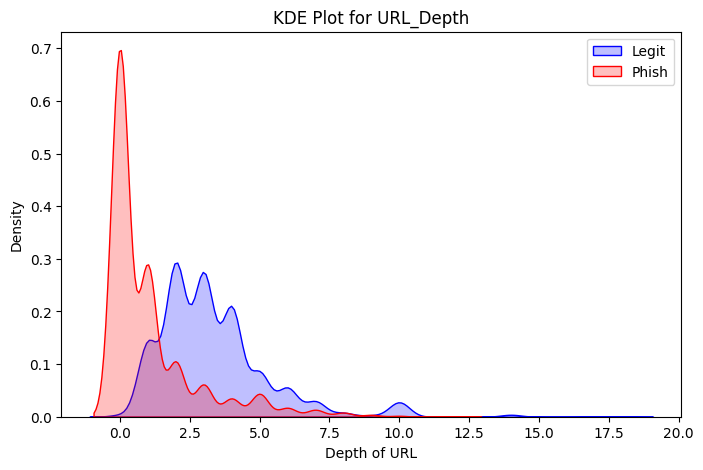

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.kdeplot(data=legitimate['URL_Depth'], fill=True, label='Legit', color='blue')
sns.kdeplot(data=phishing['URL_Depth'], fill=True, label='Phish', color='red')
plt.title(f'KDE Plot for {"URL_Depth"}')
plt.xlabel("Depth of URL")
plt.ylabel('Density')
plt.legend()
plt.show()

Correlation : measures the strength and direction of the relationship between two features

In [ ]:
legitimate = legitimate.drop(columns=['Domain'])
phishing = phishing.drop(columns=['Domain'])

In [ ]:
corr_legit = legitimate.corr().fillna(0)
corr_phish = phishing.corr().fillna(0)

In [ ]:
corr_phish

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
Have_IP,1.000000,-0.006844,0.023948,0.038589,-0.004670,-0.000850,-0.014389,-0.023624,-0.056480,0.061077,0.040818,-0.069132,-0.075030,0.001202,-0.061781,0.0
Have_At,-0.006844,1.000000,0.233615,0.182637,0.037230,-0.001611,0.067040,0.012735,-0.080473,-0.001254,0.023729,-0.145142,-0.168681,0.002278,-0.145736,0.0
URL_Length,0.023948,0.233615,1.000000,0.722719,0.111810,0.030167,0.145171,0.133660,-0.364535,0.056277,0.085490,-0.512265,-0.583088,-0.042667,-0.535716,0.0
URL_Depth,0.038589,0.182637,0.722719,1.000000,0.043881,0.015904,0.164341,0.004875,-0.383904,0.038903,0.021479,-0.551722,-0.632164,-0.091984,-0.551887,0.0
Redirection,-0.004670,0.037230,0.111810,0.043881,1.000000,-0.001099,0.004278,-0.015321,-0.071275,0.024613,0.013753,-0.100615,-0.120164,0.001554,-0.101650,0.0
https_Domain,-0.000850,-0.001611,0.030167,0.015904,-0.001099,1.000000,-0.003386,-0.005559,0.013459,0.019317,0.009604,-0.021391,-0.022930,0.000283,-0.019497,0.0
TinyURL,-0.014389,0.067040,0.145171,0.164341,0.004278,-0.003386,1.000000,0.061600,-0.083527,0.086028,0.008605,-0.177722,-0.180523,0.004789,-0.172020,0.0
Prefix/Suffix,-0.023624,0.012735,0.133660,0.004875,-0.015321,-0.005559,0.061600,1.000000,-0.121277,-0.038801,-0.040278,-0.095120,-0.106005,0.007862,-0.104231,0.0
DNS_Record,-0.056480,-0.080473,-0.364535,-0.383904,-0.071275,0.013459,-0.083527,-0.121277,1.000000,0.245532,0.255188,0.554706,0.499410,0.021022,0.621637,0.0
Domain_Age,0.061077,-0.001254,0.056277,0.038903,0.024613,0.019317,0.086028,-0.038801,0.245532,1.000000,0.470121,-0.011100,-0.059235,0.014647,0.027963,0.0


In [ ]:
corr_legit

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
Have_IP,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
Have_At,0.0,1.000000,0.0,-0.038613,-0.008199,0.0,-0.019358,-0.005125,-0.023101,-0.059156,0.031306,-0.018319,-0.016903,0.0,-0.008350,0.0
URL_Length,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
URL_Depth,0.0,-0.038613,0.0,1.000000,-0.040023,0.0,-0.000947,-0.013236,-0.123472,-0.164131,-0.030470,-0.126330,-0.122582,0.0,-0.006156,0.0
Redirection,0.0,-0.008199,0.0,-0.040023,1.000000,0.0,0.085640,-0.008362,-0.037690,0.013830,0.051077,-0.029888,-0.027579,0.0,-0.031440,0.0
https_Domain,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
TinyURL,0.0,-0.019358,0.0,-0.000947,0.085640,0.0,1.000000,-0.019744,-0.078306,0.001433,-0.049768,-0.038083,-0.030237,0.0,0.068437,0.0
Prefix/Suffix,0.0,-0.005125,0.0,-0.013236,-0.008362,0.0,-0.019744,1.000000,-0.014121,-0.054973,0.031929,-0.018684,-0.017240,0.0,-0.026445,0.0
DNS_Record,0.0,-0.023101,0.0,-0.123472,-0.037690,0.0,-0.078306,-0.014121,1.000000,0.356220,0.143913,0.184837,0.172045,0.0,0.059682,0.0
Domain_Age,0.0,-0.059156,0.0,-0.164131,0.013830,0.0,0.001433,-0.054973,0.356220,1.000000,0.292071,-0.050733,-0.033029,0.0,-0.074445,0.0


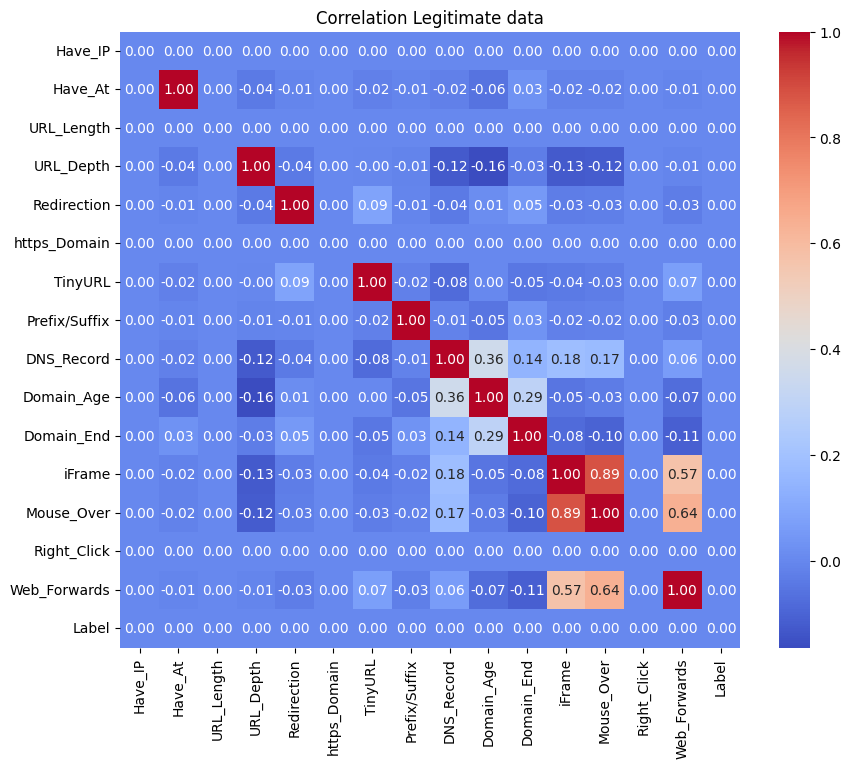

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_legit, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Legitimate data')
plt.show()

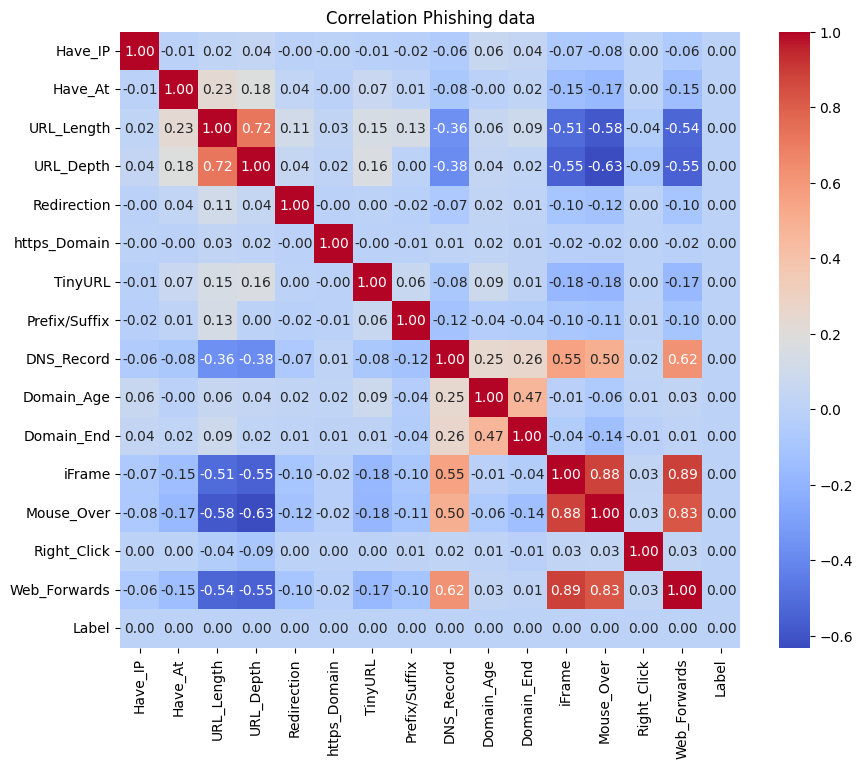

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_phish, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Phishing data')
plt.show()

Using two separate data results complex analysis
so the file "combined_urls.csv" consists of both legitimate and phishing data for overall analysis.

In [ ]:
legitimate

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0
4996,0,0,1,7,0,0,0,0,0,0,0,0,0,1,1,0
4997,0,1,1,2,0,0,0,0,0,0,1,0,0,1,0,0
4998,0,0,1,6,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
phishing

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1
1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1
2,0,0,0,1,0,0,0,0,1,1,1,0,1,1,0,1
3,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1
4996,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0,1
4997,0,1,1,3,0,0,1,0,0,1,1,1,0,1,0,1
4998,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1


In [ ]:
legitimate

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0
4996,0,0,1,7,0,0,0,0,0,0,0,0,0,1,1,0
4997,0,1,1,2,0,0,0,0,0,0,1,0,0,1,0,0
4998,0,0,1,6,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Concatenating the dataframes into one
urldata = pd.concat([legitimate, phishing])
urldata

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1
4996,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0,1
4997,0,1,1,3,0,0,1,0,0,1,1,1,0,1,0,1
4998,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1


In [ ]:
# Storing the data in CSV file
urldata.to_csv('combined_data.csv', index=False)

This notebook includes the complete analysis and code for exploring and analyzing the feature engineered dataset.